# XGBOOST

## 1. Definition

## 2. Libraries

In [33]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn import metrics

from sklearn.metrics import classification_report

import pickle 

## 3. Load Data

In [8]:
loan = pd.read_csv('../data/BB.DD_MODELOS.csv')
loan.shape

(460541, 50)

In [ ]:
loan.head()

In [9]:
data = loan.iloc[:,1:]
data.head()

,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)","('delinq_amnt',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,-0.018151,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,-0.018151,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,-0.018151,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [10]:
X = data.drop(['loan_acceptance'], axis = 1).values
Y = data['loan_acceptance'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1) # 90% Train 10% Test 

## 4. XGBOOST Model

In [6]:
%%time
estimator = xgb.XGBClassifier(n_estimators=100)
                                                                                                                         
estimator.fit(X_train, Y_train)

CPU times: user 5min 51s, sys: 3.68 s, total: 5min 55s
Wall time: 1min 52s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
pred = estimator.predict(X_test)
print(pred)

[1 1 1 ... 1 1 1]


In [8]:
accuracy_score(Y_test, pred)

0.7604386060145478

## XGBOOST MODEL hyperparameters

In [16]:
param_test = {
    'objective' :['binary:logistic'],
    'max_depth':[3,5]   
}

gXGBoost = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators = 100),
                        param_grid = param_test, scoring = 'roc_auc', n_jobs=-1)

In [17]:
%%time
gXGBoost.fit(X_train, Y_train)

CPU times: user 2min 29s, sys: 1.19 s, total: 2min 30s
Wall time: 7min 53s


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [18]:
gXGBoost.best_params_

{'max_depth': 5, 'objective': 'binary:logistic'}

In [19]:
gXGBoost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
pred = gXGBoost.predict(X_test)

print(pred)

[0 1 1 ... 1 1 1]


In [22]:
accuracy_score(Y_test, pred)

0.7621105200303985

### Confusion Matrix

In [23]:
confusion_matrix = confusion_matrix(Y_test, pred)
confusion_matrix = pd.DataFrame(confusion_matrix)

In [24]:
def conf_matrix(Y_test, pred):
    conf_plot = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_ylabel('Predicted Label')
    conf_plot.set_xlabel('True Label');

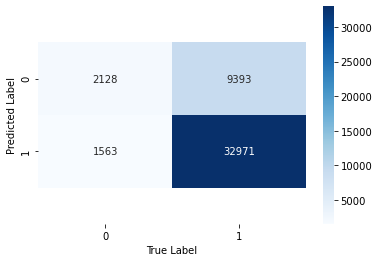

In [25]:
conf_matrix(Y_test, pred)

Like in the other models, our XGBoost predict well the good payers. In the right part of the confusion matrix we observe a good proportion of good-payers detected. 
Nevertheless, we have problems to detect the non payers. We can 


### Confusion Matrix Normalized

In [38]:
confusion_matrix_normalize = confusion_matrix(Y_test, pred, normalize = 'pred')
confusion_matrix_normalize = pd.DataFrame(confusion_matrix_normalize)

In [41]:
def conf_matrix(Y_test, pred):
    conf_plot = sns.heatmap(confusion_matrix_normalize, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix")

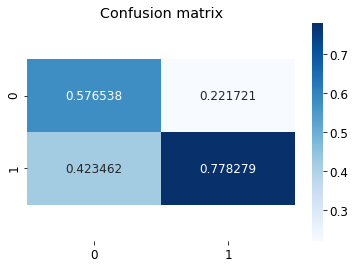

In [42]:
conf_matrix(Y_test, pred)

### ROC Curve

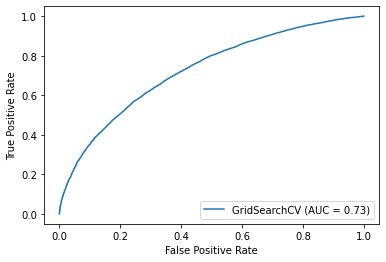

In [31]:
metrics.plot_roc_curve(gXGBoost, X_test, Y_test)
plt.show()

The area below the curve show a good area. The biggest area below means better model. The statistic that we can see in the low-right part is one statistic to compare the models

### Cumulative Gains Curve 

In [34]:
predicted_probas = gXGBoost.predict_proba(X_test)

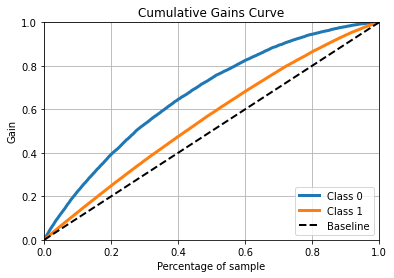

In [35]:
skplt.metrics.plot_cumulative_gain(Y_test, predicted_probas)
plt.show()

### Lift Curve

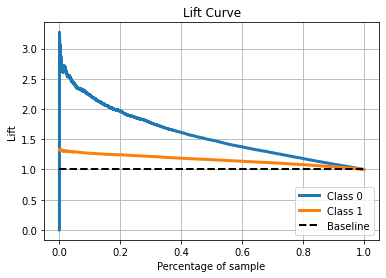

In [36]:
skplt.metrics.plot_lift_curve(Y_test, predicted_probas)
plt.show()

### Histogram

Text(0, 0.5, 'Frequency')

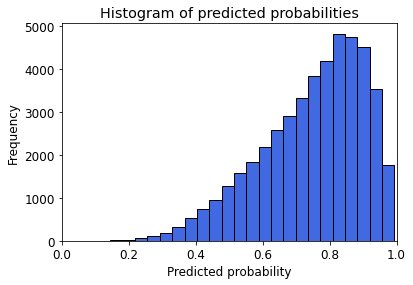

In [37]:
y_pred_prob = predicted_probas[:, 1]

plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob, bins=25,facecolor='royalblue', edgecolor = 'black')
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

### Model Statistics

In [44]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.18      0.28     11521
           1       0.78      0.95      0.86     34534

    accuracy                           0.76     46055
   macro avg       0.68      0.57      0.57     46055
weighted avg       0.73      0.76      0.71     46055



### Save the model 


In [43]:
model = gXGBoost
filename = 'XGB.sav'
pickle.dump(model, open(filename, 'wb'))